In [2]:
# Cell 1
import math
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

plt.rcParams["figure.figsize"] = (7, 7)
# plt.rcParams["axes.equal"]     = True


In [3]:
# Cell 2
def hex_basis(r: float, orientation: str = "pointy"):
    """Return the two lattice basis vectors (a, b) for a given orientation."""
    if orientation == "flat":      # flat-topped hexagons
        a = np.array([1.5 * r,  math.sqrt(3)/2 * r])   # right-down
        b = np.array([0.0    ,  math.sqrt(3)   * r])   # straight down
        rot = 0
    else:                           # pointy-topped hexagons
        a = np.array([math.sqrt(3)   * r, 0.0])        # straight right
        b = np.array([math.sqrt(3)/2 * r, 1.5 * r])    # down-right
        rot = 30
    return a, b, rot


def hex_centroid(i: int, j: int, r: float, orientation="pointy"):
    """Cartesian coords of the hexagon whose axial index is (i, j)."""
    a, b, _ = hex_basis(r, orientation)
    return i * a + j * b


def hex_vertices(cx: float, cy: float, r: float, rot_deg: float):
    """Return the six (x,y) vertices of a hex centred on cx,cy."""
    angles = np.deg2rad(np.arange(0, 360, 60) + rot_deg)
    return [(cx + r * math.cos(t), cy + r * math.sin(t)) for t in angles]


In [4]:
# Cell 3
def make_hex_grid(N=6, r=1.0, orientation="pointy"):
    """
    Build hexes for axial indices i,j in [-N … N].
    Returns a list of matplotlib.patches.Polygon objects.
    """
    _, _, rot = hex_basis(r, orientation)
    patches = []
    for i in range(-N, N+1):
        for j in range(-N, N+1):
            cx, cy = hex_centroid(i, j, r, orientation)
            verts = hex_vertices(cx, cy, r, rot)
            patches.append(Polygon(verts, closed=True, edgecolor="k"))
    return patches


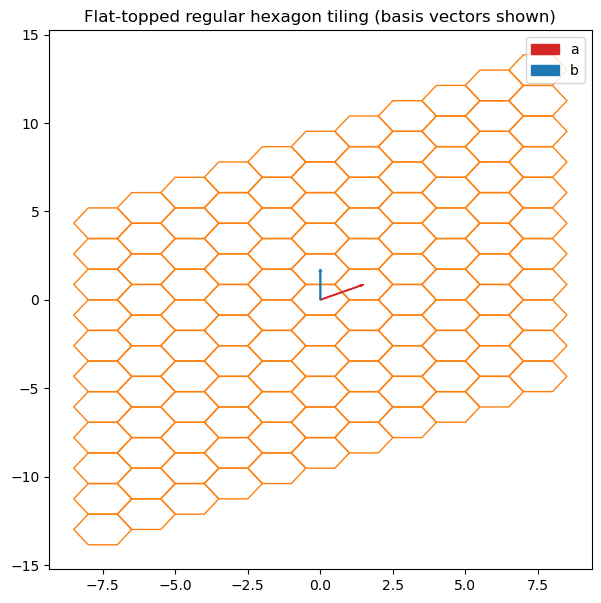

In [5]:
# Cell 4
flat_hexes = make_hex_grid(N=5, r=1.0, orientation="flat")

fig, ax = plt.subplots()
ax.add_collection(PatchCollection(flat_hexes, facecolor="none", edgecolor="tab:orange"))
ax.set_title("Flat-topped regular hexagon tiling (basis vectors shown)")
ax.autoscale()

# draw the two basis vectors from the origin so you can see why the centroids tile
a, b, _ = hex_basis(r=1.0, orientation="flat")
ax.arrow(0, 0, *a, width=0.03, length_includes_head=True, color="tab:red", label="a")
ax.arrow(0, 0, *b, width=0.03, length_includes_head=True, color="tab:blue", label="b")
ax.legend()
plt.show()


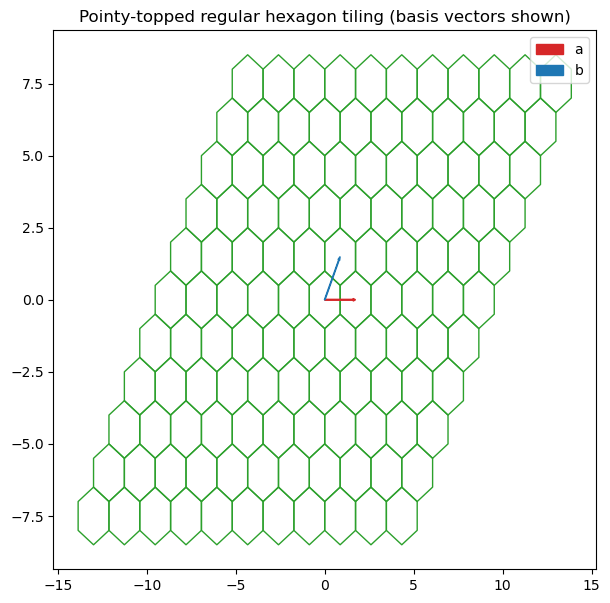

In [6]:
# Cell 5
pointy_hexes = make_hex_grid(N=5, r=1.0, orientation="pointy")

fig, ax = plt.subplots()
ax.add_collection(PatchCollection(pointy_hexes, facecolor="none", edgecolor="tab:green"))
ax.set_title("Pointy-topped regular hexagon tiling (basis vectors shown)")
ax.autoscale()

a, b, _ = hex_basis(r=1.0, orientation="pointy")
ax.arrow(0, 0, *a, width=0.03, length_includes_head=True, color="tab:red", label="a")
ax.arrow(0, 0, *b, width=0.03, length_includes_head=True, color="tab:blue", label="b")
ax.legend()
plt.show()
